In [15]:
include("../src/include_file.jl")

diffusion_a_priori (generic function with 1 method)

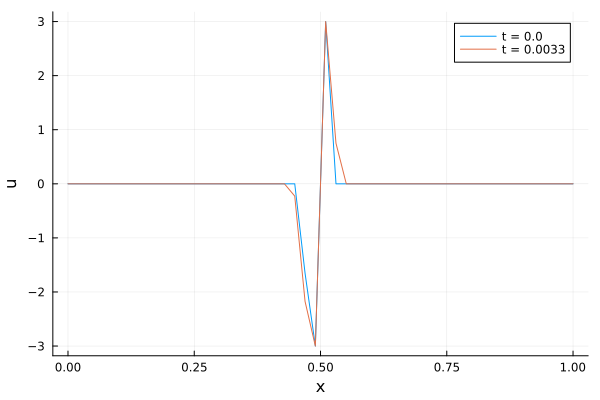

sol.worstLowDiffVec = [-6.750000000000003]
sol.domain.sourceVec = nothing
sol = optimize((gamma->begin
                #= c:\Users\marie\Documents\Cours\3ème_année\Stage\NumericalDiffusion\src\opt_diffusion.jl:438 =#
                J(optimFunctional, gamma, u_approx[end - 1], u_approx[end], Nx, dx, dt_vec[end], m_vec, M_vec, equation, domain)
            end), gamma_init; kwargs...) =  * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.629889e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≰ 1.0e-10

 * Work counters
    Seconds run:   8  (vs limit Inf)
    Iterations:    100000
    f(x) calls:    115243

Maximal diffusion value : 1.1909120163860196


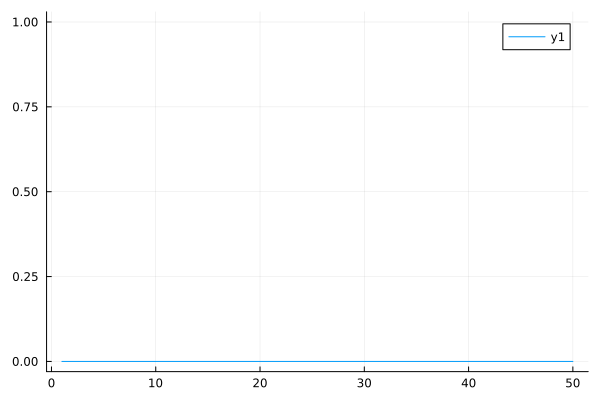

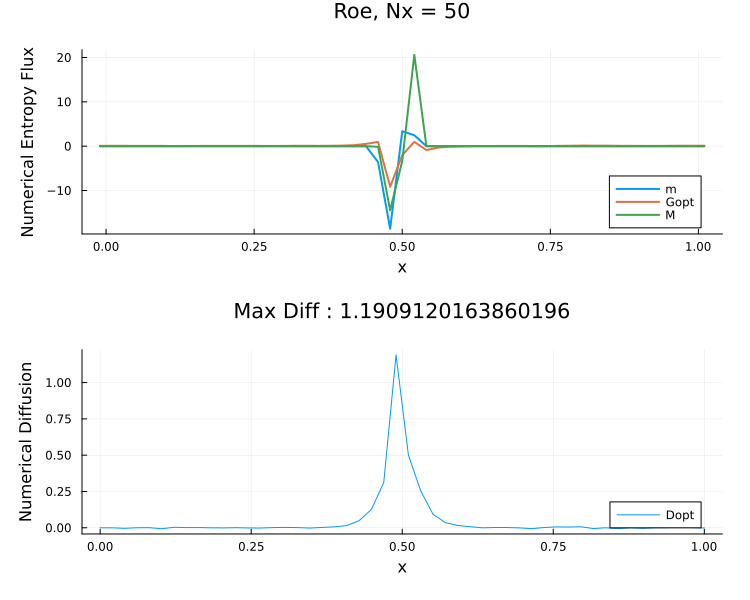

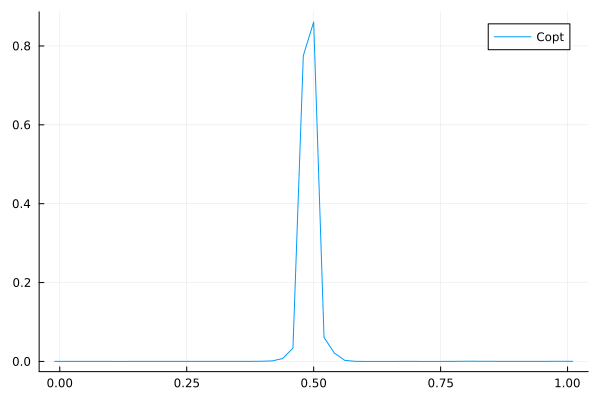

In [16]:
Nx = 50
xmin, xmax = 0.0, 1.0
CFL_factor = 0.5
eq = burgers()
method = Roe(CFL_factor)
boxBounds=[-3 3;]

nb_repetitions = 1

for k in 1:nb_repetitions
    sol = iterate_WID(xmin, xmax, Nx, eq, method; nb_it=1, boxBounds=boxBounds)
    @show sol.worstLowDiffVec
    @show sol.domain.sourceVec
    # Reconstruction of the initial data from the optimization results
    #u_init, z = extendInitialDataToK(sol, Nx)
    u_init, z = extendInitialDataToK(sol, Nx)

# Optimization at first timestep
    domain = createInterval(xmin, xmax, Nx, 0.0, 0.1)
    dt = sol.method.CFL_factor * domain.dx / CFL_cond(sol.equation, u_init) # Timestep given by CFL condition
    domain = createUnitInterval(Nx, 0.0, dt)# Redefining the domain with dt as final time
    domain.sourceVec = z
    fv_sol = fv_solve(domain, u_init, eq, method)
    display(plot_fv_sol(fv_sol, nb_plots=2))
    solEnt = optimize_for_entropy(u_init, domain, eq, method; iterations=100000, g_tol=1e-10)#, modifiedDataType=maxK())
    plot_solution(solEnt)
    
    display(plot(solEnt.domain.interfaces, solEnt.Copt, label="Copt"))
end